In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, model_from_json
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import keras
import numpy as np
from PIL import Image
from scipy import misc
from matplotlib import pyplot as plt

Using Theano backend.


In [4]:
img_width, img_height = 70, 70
train_data_dir = 'train/'
validation_data_dir = 'validation/'
batch_size = 17

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size)

Found 4000 images belonging to 4 classes.
Found 1600 images belonging to 4 classes.


/home/anastasia/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(70, 70, 3..., activation="relu", kernel_initializer="random_uniform", padding="same")`


Epoch 1/20
235/235 [==============================] - 232s - loss: 1.3089 - acc: 0.4045 - val_loss: 0.9717 - val_acc: 0.6815

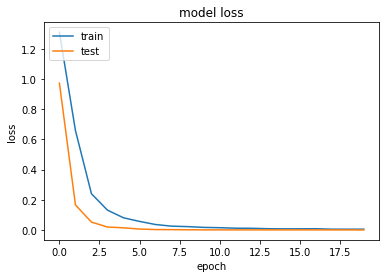

In [6]:
nb_train_samples = 4000
nb_validation_samples = 1600
epochs = 20

model = Sequential()
model.add(Conv2D(16, (3, 3), border_mode='same', input_shape=input_shape,activation='relu', kernel_initializer="random_uniform"))
model.add(Conv2D(32, (3, 3),activation='relu', kernel_initializer="random_uniform"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu', kernel_initializer="random_uniform"))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model_json = model.to_json()
json_file = open("CNN_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("CNN_model.json.h5")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


In [11]:
def predicted(file_of_image):
    im = misc.fromimage(Image.open(file_of_image).resize((70,70)).convert("RGB"))
    im =  im / 255.
    plt.imshow(im)
    plt.show()
    predicted = model.predict(im.reshape((1,70,70,3)))
    return predicted

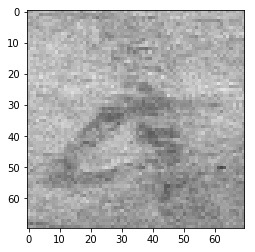

array([[  9.97778416e-01,   2.42306298e-04,   1.22016991e-05,
          1.96706015e-03]], dtype=float32)

In [16]:
predicted("А2.png")

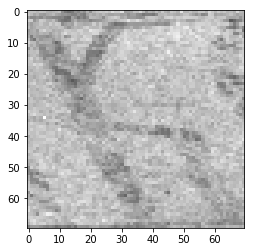

array([[  1.62617853e-09,   6.44112970e-06,   2.30693104e-06,
          9.99991238e-01]], dtype=float32)

In [13]:
predicted("К2.png")

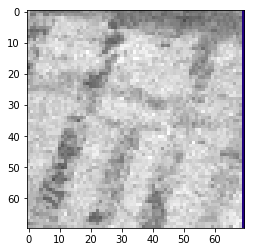

array([[  1.73172302e-04,   1.22734815e-01,   7.57159991e-03,
          8.69520426e-01]], dtype=float32)

In [14]:
predicted("Ж2.png")

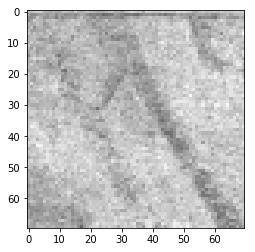

array([[  7.56604493e-01,   3.38809834e-08,   2.43379518e-01,
          1.59414776e-05]], dtype=float32)

In [15]:
predicted("И2.png")